In [2]:
# Loading dataset
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

df = pd.read_csv("/content/hiring.csv")

In [3]:
# Handle missing values
df['experience'] = df['experience'].fillna("zero")
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].mean())

# Convert 'experience' text to numbers
def convert_to_int(word):
    word_dict = {
        'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4,
        'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9,
        'ten': 10
    }
    return word_dict.get(word, 0)

df['experience'] = df['experience'].apply(convert_to_int)

# Features and target
X = df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]
y = df['salary($)']

In [4]:
# Train the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

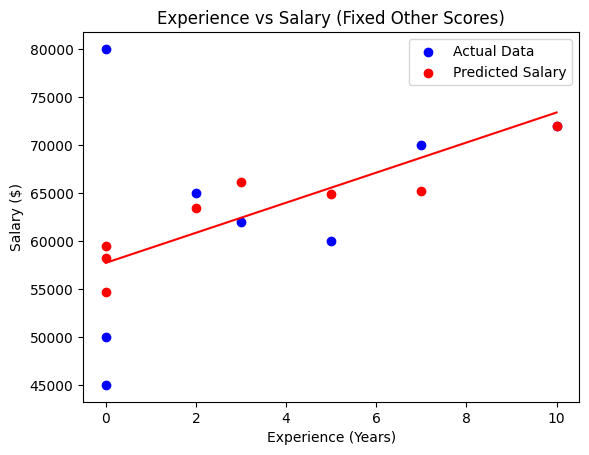

In [ ]:
# Plot
import matplotlib.pyplot as plt

# Fixed values
fixed_test_score = df['test_score(out of 10)'].mean()
fixed_interview_score = df['interview_score(out of 10)'].mean()

# Create experience range
experience_range = np.linspace(df['experience'].min(), df['experience'].max(), 100)
predicted_salary = model.predict(np.c_[experience_range,
                                       np.full_like(experience_range, fixed_test_score),
                                       np.full_like(experience_range, fixed_interview_score)])

plt.scatter(df['experience'], y, color='blue', label='Actual Data')
plt.scatter(df['experience'], model.predict(X), color='red', label='Predicted Salary')
plt.plot(experience_range, predicted_salary, color='red')
plt.xlabel("Experience (Years)")
plt.ylabel("Salary ($)")
plt.title("Experience vs Salary (Fixed Other Scores)")
plt.legend()
plt.show()


In [ ]:
# Predictions
predicted_salary = model.predict([[2, 9, 6]])  # Example: 2 years exp, 9 test score, 6 interview score
print("Predicted Salary:", predicted_salary[0])

# Model details
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Predicted Salary: 57403.24743480464
Intercept: 48105.54293872683
Coefficients: [1566.64339181 -383.33766372 1602.40944765]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
